# Price Prediction of Used Ford Cars

Ford cars are resold depending of various factors such as model, mileage, etc. This datasets includes such information on used Ford cars sold during the years 1996 and 2020. 

**Attributes/Columns**

- model - model of the car
- year - year of manufacture
- price - price of the car
- transmission - type of transmission in the car (Automatic, Manual and Semi-automatic)
- mileage - mileage of the car
- fuelType - type of fuel used in the car (Petrol, Diesel, Electric, Hybrid and Others)
- mpg - miles the car run per gallon
- engineSize - size of the engine used in the car

**Data Source**
<br> https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to remove warnings 
import warnings
warnings.filterwarnings(action= 'ignore')

# to install scikit-learn, <pip install -U scikit-learn> in Command Prompt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

### Reading the Dataset

In [2]:
# Naming the DataFrame - df
# Reading the .xlsx or .csv file using pandas: pd.read_csv("<location of dataset>")
df = pd.read_csv("ford.csv")

# Displaying the first 5 rows of the DataFrame
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


### Number of rows and columns

In [3]:
# <name_of_DataFrame>.shape
df.shape

# output - (total number of rows, total number of columns)

(17964, 8)

###  Data Types and Missing Values

In [4]:
# <name_of_DataFrame>.info()
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


None

**Overview:**

- Total number of observations/rows: 17964 
- Total number of attributes/columns: 8
- Total number of object (string/mixed) data type: 3 (model, transmission, fuelType)
- Total number of integer (positive/negative/zero) data type: 3 (year, price, mileage)
- Total number of float (floating point number) data type: 2 (mpg, engineSize)
- No missing data

### Descriptive Statistics

In [5]:
# Creating Descriptive Statistics table
# <name_of_DataFrame>.describe()

df.describe()

,year,price,mileage,mpg,engineSize
count,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2016.864173,12280.078435,23361.880149,57.907832,1.350824
std,2.024987,4741.318119,19471.243292,10.125632,0.432383
min,1996.000000,495.000000,1.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,58.900000,1.200000
75%,2018.000000,15299.000000,31052.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,201.800000,5.000000


**Observations**
 - 50% of the data was collected between 2017 and 2020.
 - The average price of used cars is \\$12280. The lowest price is \\$495 and highest price is  \\$54995 while half of the observations show price below \\$11291. 
 - The mileage ranges from 1 to 177644, however, 75% of the observations shows mileage above 9987, with average at 23361.
 - The mpg varies from 20.8 to 201.
 - The engine size varies from 0 to 5L.

### Listing the columns

In [6]:
print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


### Encoding categorical variables using One-Hot encoder
Instead of using label encoding, the categorical variables are encoded using One-hot because they are classified into multiclass and since there is no ranking or order in the categorization, one-hot encoder is best suited for this project. 

In [7]:
# drop_first is used to drop the first column created; this is specified to avoid multicollinearity
df = pd.get_dummies(df, drop_first=True)
print(df.columns)

Index(['year', 'price', 'mileage', 'mpg', 'engineSize', 'model_ C-MAX',
       'model_ EcoSport', 'model_ Edge', 'model_ Escort', 'model_ Fiesta',
       'model_ Focus', 'model_ Fusion', 'model_ Galaxy', 'model_ Grand C-MAX',
       'model_ Grand Tourneo Connect', 'model_ KA', 'model_ Ka+',
       'model_ Kuga', 'model_ Mondeo', 'model_ Mustang', 'model_ Puma',
       'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')


### Displaying the new columns with data 

In [8]:
# To observe and understand how One-hot encoding works. 
pd.set_option('display.max_columns', None)
df.head()

,year,price,mileage,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,model_ Focus,model_ Fusion,model_ Galaxy,model_ Grand C-MAX,model_ Grand Tourneo Connect,model_ KA,model_ Ka+,model_ Kuga,model_ Mondeo,model_ Mustang,model_ Puma,model_ Ranger,model_ S-MAX,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,57.7,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,14000,9083,57.7,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2017,13000,12456,57.7,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,2019,17500,10460,40.3,1.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2019,16500,1482,48.7,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Specifying the feature and target variable for Linear Regression Model

In [9]:
# Target variable is price
target = ['price']

# x are the feature variables, which includes all columns except price (therefore, dropped).
X = df.drop('price', axis=1)
y = df[target]

# printing the no. of rows and column used as feature and target variable.
print(X.shape, y.shape)

(17964, 32) (17964, 1)


### Splitting the train and test set

In [10]:
# x_train are the training dataset of feature variables
# x_test are the testing dataset of feature variables
# y_train are the training dataset of target variables
# y_test are the testing dataset of target variables
# Split into 80% train and 20% test
# random_state = Pseudo random number, specified so that everytime the code is run, it uses the same observations in train and test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14371, 32) (3593, 32) (14371, 1) (3593, 1)


### Running Linear Regression Model

In [11]:
model = LinearRegression()
model = model.fit(X_train, y_train)

### Coefficient of Each Feature Variable

In [12]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})

# Changes the scientific notation
pd.options.display.float_format = '{:.5f}'.format

# Sorts the coefficient column in ascending order
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
15,model_ Ka+,-2969.54742
26,transmission_Manual,-475.71939
14,model_ KA,-450.65222
31,fuelType_Petrol,-225.41749
27,transmission_Semi-Auto,-147.20169
2,mpg,-76.59271
1,mileage,-0.06168
22,model_ Streetka,-0.00000
4,model_ C-MAX,1086.99772
0,year,1123.91310


#### Interpretation of the Coefficients
Coefficients are mainly used to understand the relationship between target variable and feature variables. 
1. A positive relationship, shown by a positive sign, indicates that as the value of feature variables increase, the value of target variable also increase. 
2. A negative relativeship, shown by a negative sign, indicates that as the value of feature variables increases, the value of target variable decreases. 
For example, one unit change in feature variablle- model_Ka+, the price decreases by 2969.

### y-Intercept

In [13]:
model.intercept_

array([-2253986.573092])

### Price Prediction using Test Set

In [14]:
y_pred = model.predict(X_test)
print(y_pred)

[[14184.68197154]
 [10656.02555946]
 [11867.63422553]
 ...
 [ 6868.41066093]
 [ 8979.27683283]
 [15955.91949667]]


### Prediction Error using Mean Absolute Error (MAE) 

In [15]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ", MAE)

Mean Absolute Error =  1376.6117960056251


### Prediction Error using Mean Absolute Percentage Error (MAPE) 

In [16]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error = ", MAPE*100)

Mean Absolute Percentage Error =  14.67075630677347


### Prediction Error using Mean Squared Error (MSE) 

In [17]:
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error = ", MSE)

Mean Squared Error =  3426372.0616999944


### Prediction Error using Root Mean Squared Error (RMSE) 

In [18]:
# RMSE is the standard deviation of the residual error

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error = ", RMSE)

Root Mean Squared Error =  1851.046207337892


### Prediction Error using Coefficient of Determination (r-squared)

In [19]:
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

coefficient of determination =  0.8484983735532793


### Visualization to Compare the Actual Price vs Predicted Price

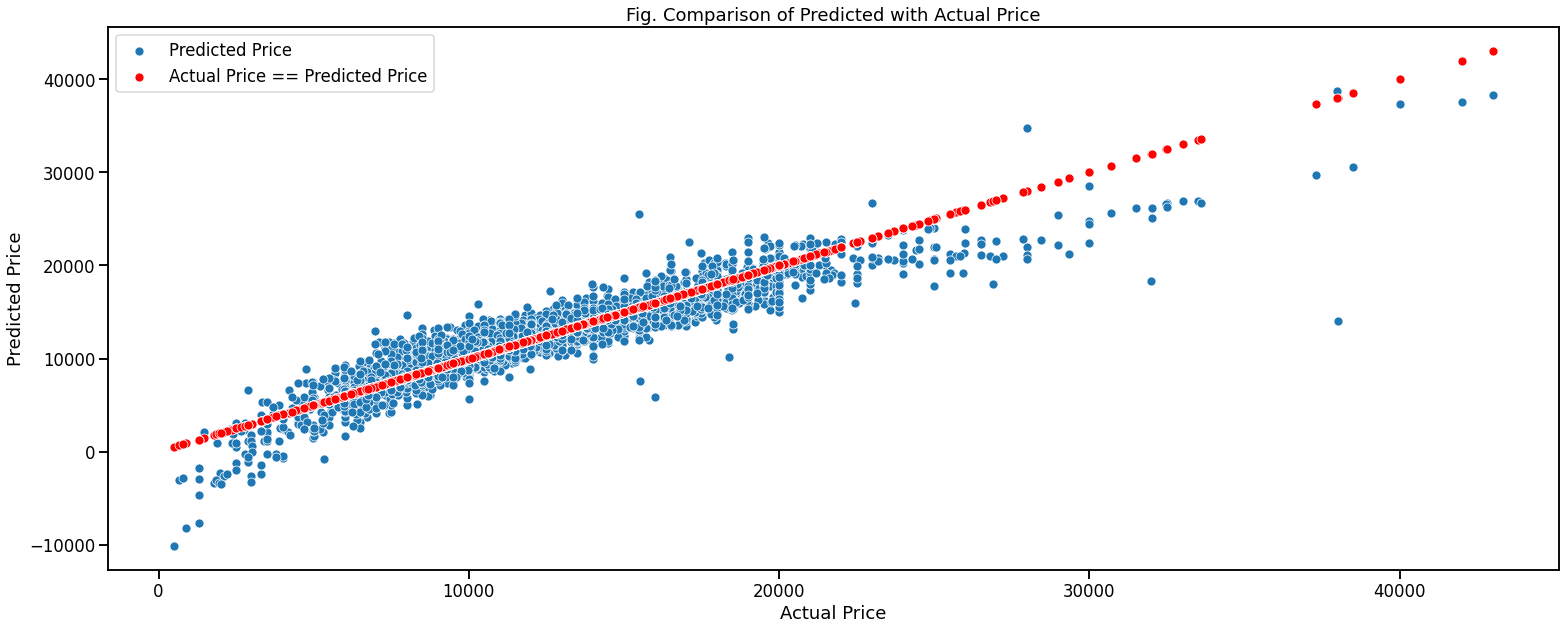

In [20]:
sns.set_context('talk')
plt.figure(figsize=(26,10))

y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

# Shows predicted price
sns.scatterplot(x='price', y='pred', data=y_test, label='Predicted Price')

# Assuming actual price is the same as predicted price, denoted by the red line
# This helps to understand how much the predicted price (blue points) is different from the actual price.
sns.scatterplot(x='price', y='price', data=y_test, color='red',label='Actual Price == Predicted Price')

plt.title("Fig. Comparison of Predicted with Actual Price")
plt.ylabel("Predicted Price")
plt.xlabel("Actual Price")
plt.show()